Steps to Build a Basic Artificial Neural Network 
1. Empty Model(Sequential/Model)
2. Add The Input Layer (Dense)                      #####  Dense--class
3. Add the Hiddem Layers (upto n) (Dense)
4. Add The Output Layers (Dense)
5. Compile the Model (Configurations of Optimizers,Loss Functions, Metrics)
6. Training the Model

In [1]:
import tensorflow as tf

In [2]:
import tensorflow.keras.datasets as data

In [3]:
d=data.fashion_mnist.load_data()

In [4]:
(xtrain,ytrain),(xtest,ytest)=d

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
import IPython.display as ipd

In [7]:
xtrain[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
import matplotlib.pyplot as plt

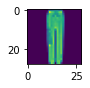

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(xtrain[1000,:,:])

In [10]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
import pandas as pd

In [12]:
labl = '''0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle-boot'''.split('\n')
labels = {i.split()[0]:i.split()[-1] for i in labl}
labels

{'0': 'T-shirt/top',
 '1': 'Trouser',
 '2': 'Pullover',
 '3': 'Dress',
 '4': 'Coat',
 '5': 'Sandal',
 '6': 'Shirt',
 '7': 'Sneaker',
 '8': 'Bag',
 '9': 'Ankle-boot'}

In [13]:
xtrain1 = xtrain.reshape(-1,784)
xtest1 = xtest.reshape(-1,784)

In [14]:
xtrain1.shape

(60000, 784)

In [15]:
xtest1.shape

(10000, 784)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(activation='relu',input_shape=(784,),units=128))                    ## input layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))                                       ## hidden layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))                                ## output layer  Categorical data so softmax or sigmoid
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])          ## compilation  

In [17]:
history = model.fit(xtrain1,ytrain,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6981 - accuracy: 0.7078
Epoch 2/20
1875/1875 [==============================] - 2s 914us/step - loss: 0.6794 - accuracy: 0.7657
Epoch 3/20
1875/1875 [==============================] - 2s 960us/step - loss: 0.6524 - accuracy: 0.7832
Epoch 4/20
1875/1875 [==============================] - 2s 957us/step - loss: 0.6099 - accuracy: 0.7991
Epoch 5/20
1875/1875 [==============================] - 2s 982us/step - loss: 0.5732 - accuracy: 0.8069
Epoch 6/20
1875/1875 [==============================] - 2s 982us/step - loss: 0.5221 - accuracy: 0.8229
Epoch 7/20
1875/1875 [==============================] - 2s 973us/step - loss: 0.4972 - accuracy: 0.8301
Epoch 8/20
1875/1875 [==============================] - 2s 958us/step - loss: 0.4790 - accuracy: 0.8341
Epoch 9/20
1875/1875 [==============================] - 2s 943us/step - loss: 0.4589 - accuracy: 0.8399
Epoch 10/20
1875/1875 [==============================] - 2s 924us/

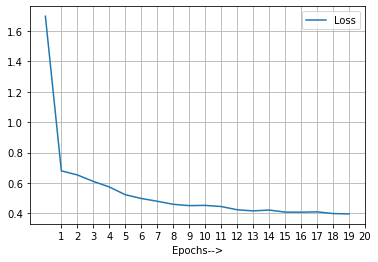

In [18]:
plt.plot(history.history['loss'])
plt.legend(['Loss'])
plt.grid()
plt.xticks(range(1,21))
plt.xlabel('Epochs-->')
plt.show()

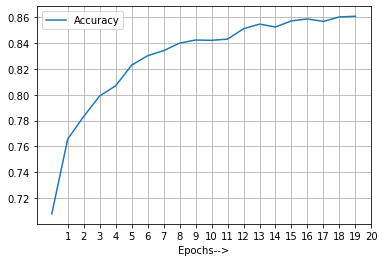

In [19]:
plt.plot(history.history['accuracy'])
plt.legend(['Accuracy'])
plt.grid()
plt.xticks(range(1,21))
plt.xlabel('Epochs-->')
plt.show()

In [20]:
# model.predict()

In [21]:
ypred = model.predict(xtest1)

In [22]:
ypred[0]

array([2.4183430e-10, 8.7858314e-07, 9.7820330e-25, 3.7242196e-09,
       7.9380854e-13, 1.0876876e-02, 6.2898642e-09, 9.3523366e-03,
       8.5421461e-06, 9.7976136e-01], dtype=float32)

In [23]:
for i,v in enumerate(ypred[0]):
    print(i,':','{0:.10f}'.format(v))

0 : 0.0000000002
1 : 0.0000008786
2 : 0.0000000000
3 : 0.0000000037
4 : 0.0000000000
5 : 0.0108768763
6 : 0.0000000063
7 : 0.0093523366
8 : 0.0000085421
9 : 0.9797613621


In [24]:
ypred[0].argmax()            ## max argument

9

In [25]:
len(ypred[0])

10

In [26]:
import numpy as np

In [27]:
ypredd = np.array([i.argmax() for i in ypred])
ypredd

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

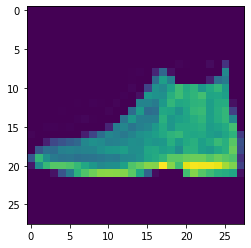

In [28]:
plt.imshow(xtest1[0].reshape(28,28))

In [29]:
ytest[9]

7

In [30]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
ypredd = np.array([labels.get(str(i)) for i in ypredd])
ytestt = np.array([labels.get(str(i)) for i in ytest])

In [32]:
len(ypredd)

10000

In [33]:
len(ytestt)

10000

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
import seaborn as sns

<AxesSubplot:>

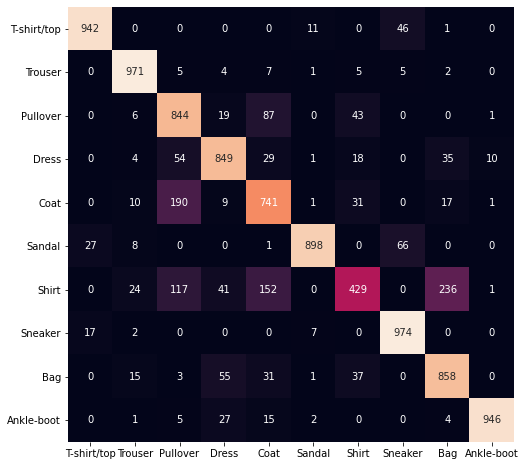

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.DataFrame(confusion_matrix(ytestt,ypredd),index=labels.values(), columns=labels.values()),annot=True,fmt='d',cbar=False)

In [37]:
print(classification_report(ytestt,ypredd))

              precision    recall  f1-score   support

  Ankle-boot       0.96      0.94      0.95      1000
         Bag       0.93      0.97      0.95      1000
        Coat       0.69      0.84      0.76      1000
       Dress       0.85      0.85      0.85      1000
    Pullover       0.70      0.74      0.72      1000
      Sandal       0.97      0.90      0.93      1000
       Shirt       0.76      0.43      0.55      1000
     Sneaker       0.89      0.97      0.93      1000
 T-shirt/top       0.74      0.86      0.80      1000
     Trouser       0.99      0.95      0.97      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000

